In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

### Train

In [2]:
train = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_train_data_PCA', sep=',')

In [3]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.003880,-0.461098,-1.188942,0.018107,0.541963,-0.010794,0.041620,0.055149,-0.000330,-0.001358
1,-0.007473,-0.599533,-1.519159,0.029847,-0.639408,-0.415963,-0.237650,-0.437798,-0.011286,-0.048951
2,-0.007635,-0.599531,-1.519159,0.029929,-0.639408,-0.415963,-0.237650,-0.437794,-0.011471,-0.048951
3,-0.007636,-0.599531,-1.519159,0.029927,-0.639408,-0.415963,-0.237650,-0.437794,-0.011472,-0.048951
4,-0.007799,-0.599529,-1.519160,0.030010,-0.639407,-0.415962,-0.237651,-0.437789,-0.011656,-0.048951


In [4]:
# set isolation = 0.01
isolation_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01,max_features=1.0)

In [5]:
isolation_forest.fit(train)

IsolationForest(contamination=0.01)

In [18]:
train_predict = isolation_forest.predict(train)

In [19]:
train['anomaly'] = train_predict

In [20]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,anomaly
0,-0.003880,-0.461098,-1.188942,0.018107,0.541963,-0.010794,0.041620,0.055149,-0.000330,-0.001358,1
1,-0.007473,-0.599533,-1.519159,0.029847,-0.639408,-0.415963,-0.237650,-0.437798,-0.011286,-0.048951,1
2,-0.007635,-0.599531,-1.519159,0.029929,-0.639408,-0.415963,-0.237650,-0.437794,-0.011471,-0.048951,1
3,-0.007636,-0.599531,-1.519159,0.029927,-0.639408,-0.415963,-0.237650,-0.437794,-0.011472,-0.048951,1
4,-0.007799,-0.599529,-1.519160,0.030010,-0.639407,-0.415962,-0.237651,-0.437789,-0.011656,-0.048951,1


In [21]:
train['anomaly'].value_counts()

 1    13743297
-1      138738
Name: anomaly, dtype: int64

### Test

In [6]:
test = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_test_data_PCA', sep=',')

In [7]:
test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.131097,5.228972,-2.591029,0.049765,0.787731,0.047003,0.069721,0.033825,-0.006065,-0.007941
1,0.116630,4.604552,-2.437162,0.046377,0.760761,0.040661,0.066637,0.036163,-0.005335,-0.007218
2,0.122011,4.796521,-2.484469,0.046862,0.769050,0.042610,0.067587,0.035417,-0.004493,-0.007440
3,0.128372,5.011400,-2.537416,0.047548,0.778327,0.044793,0.068650,0.034589,-0.003770,-0.007688
4,0.119795,4.741542,-2.470922,0.046891,0.766677,0.042052,0.067314,0.035648,-0.005418,-0.007377


In [8]:
test_predict = isolation_forest.predict(test)

In [9]:
test['anomaly'] = test_predict

In [10]:
test['anomaly'].value_counts()

 1    1051180
-1       2665
Name: anomaly, dtype: int64

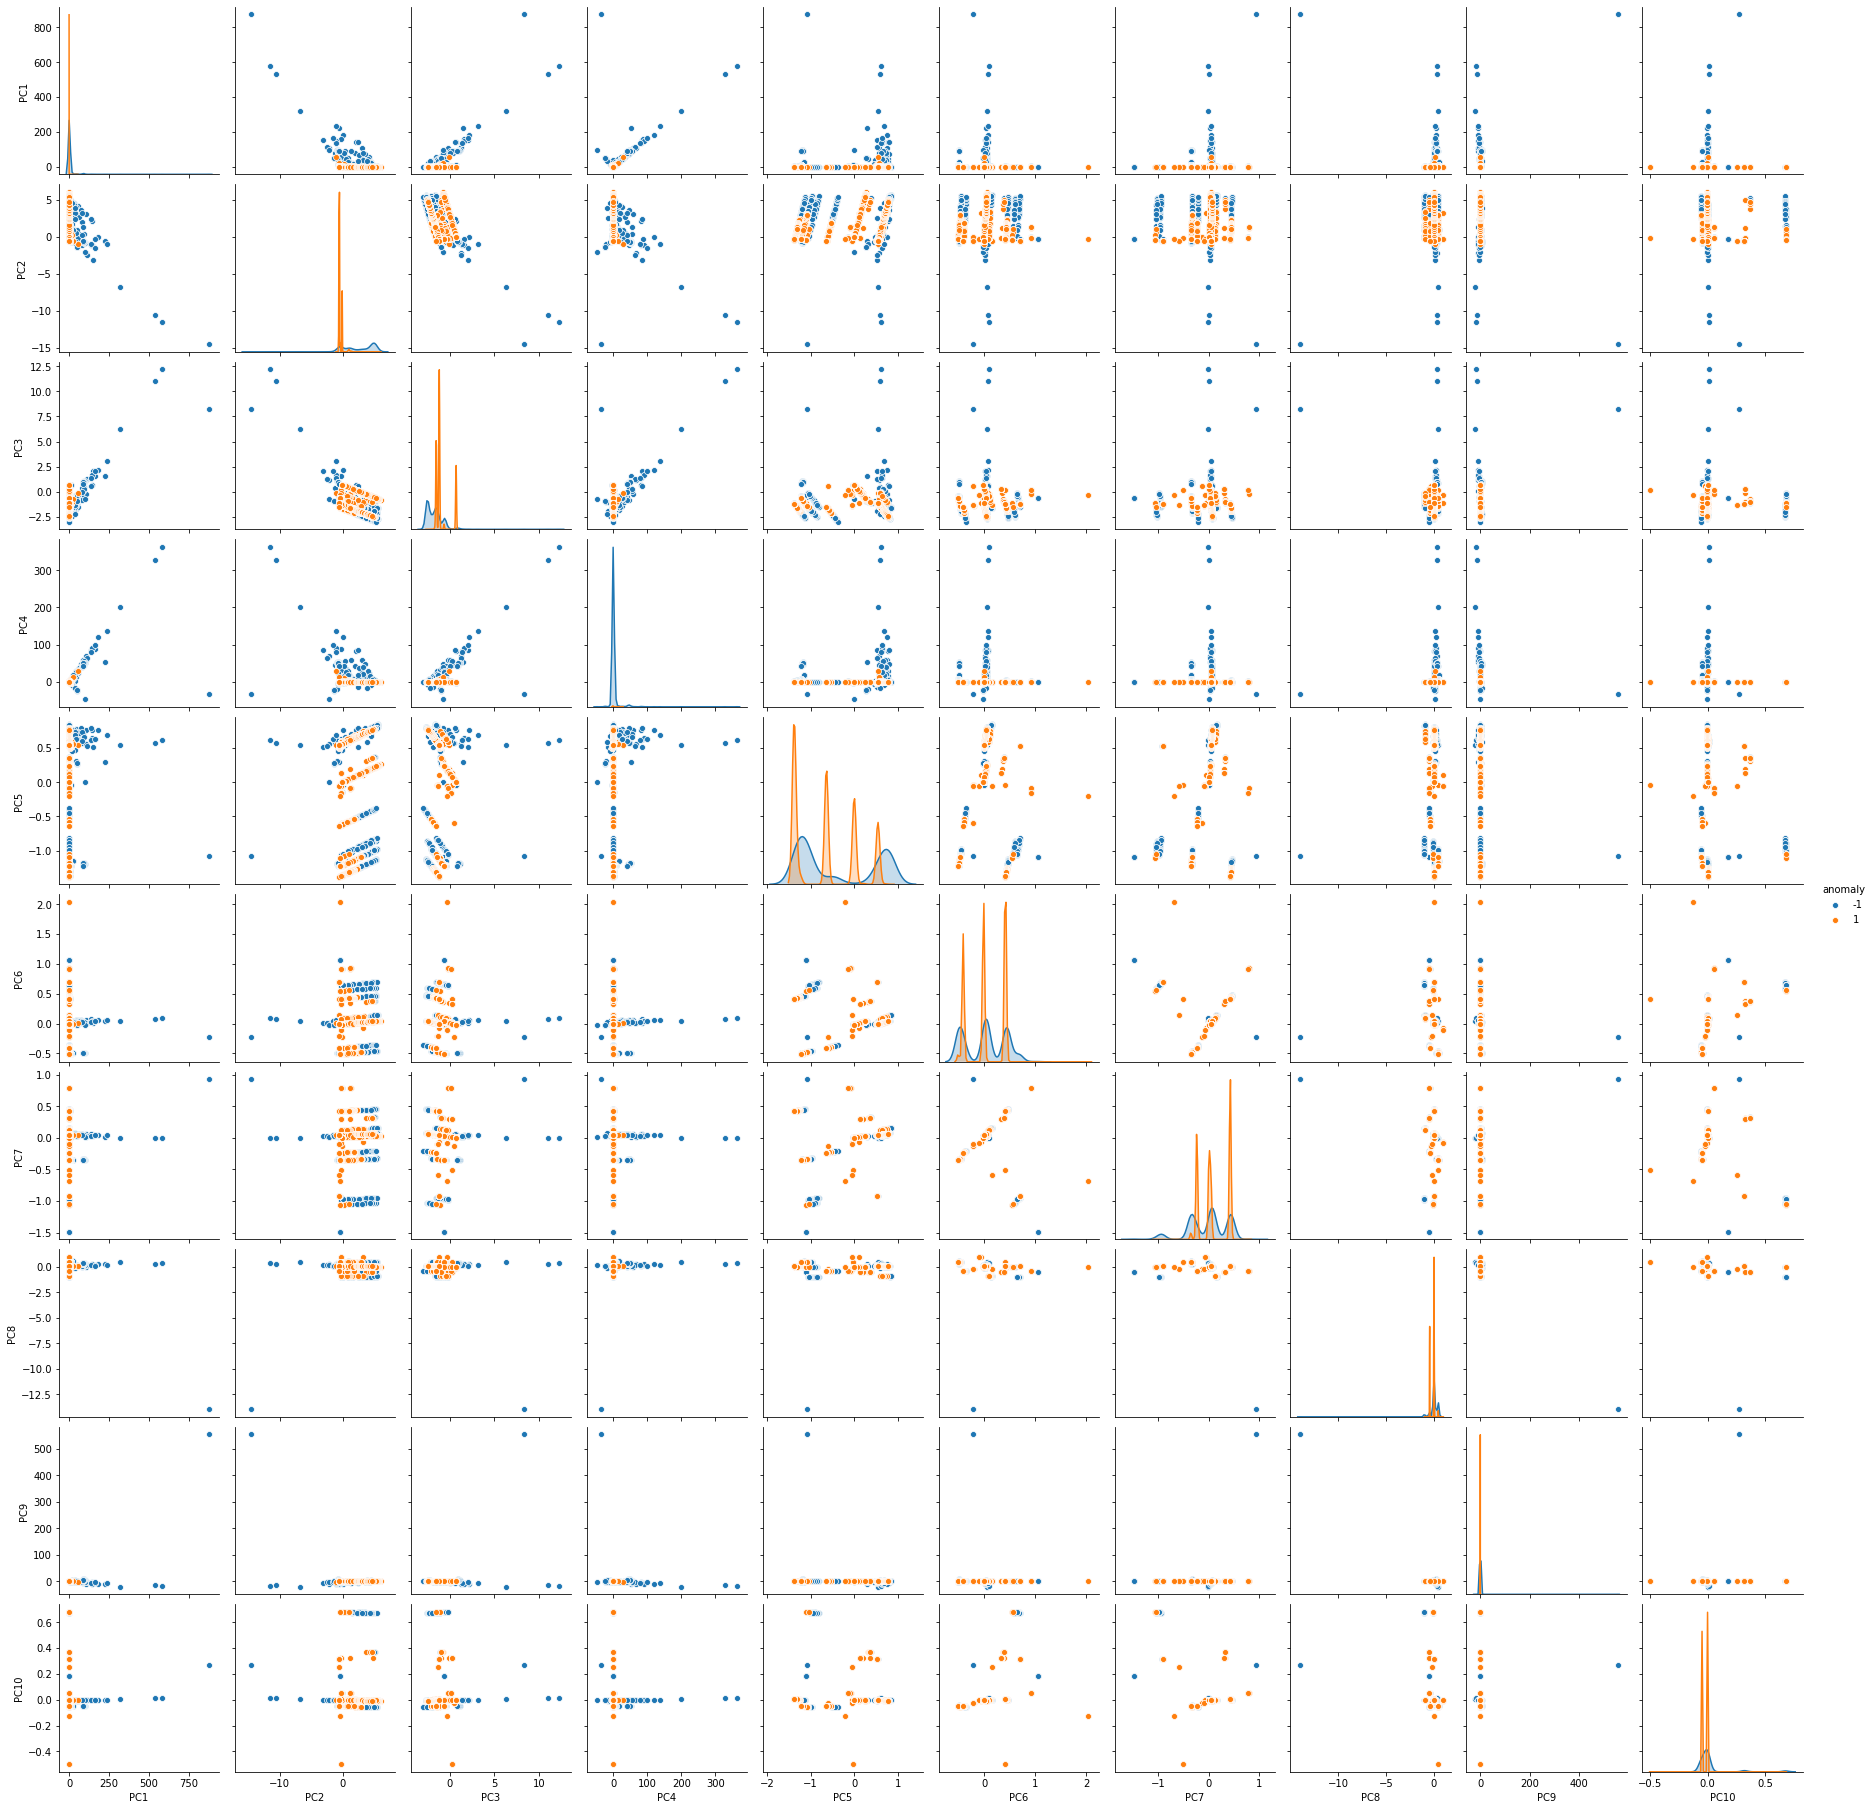

In [11]:
sns.pairplot(test, hue = 'anomaly')

In [13]:
anomalies = test.loc[test['anomaly'] == -1]

In [14]:
anomalies.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,anomaly
0,0.131097,5.228972,-2.591029,0.049765,0.787731,0.047003,0.069721,0.033825,-0.006065,-0.007941,-1
2,0.122011,4.796521,-2.484469,0.046862,0.769050,0.042610,0.067587,0.035417,-0.004493,-0.007440,-1
3,0.128372,5.011400,-2.537416,0.047548,0.778327,0.044793,0.068650,0.034589,-0.003770,-0.007688,-1
4,0.119795,4.741542,-2.470922,0.046891,0.766677,0.042052,0.067314,0.035648,-0.005418,-0.007377,-1
5,0.126458,5.056449,-2.548518,0.049036,0.780281,0.045251,0.068868,0.034483,-0.006324,-0.007741,-1


In [15]:
anomalies.to_csv('predictions/A1_test_iForest_PCA.csv', sep=',')

In [17]:
original_test = pd.read_csv('../ml-data/cyberattack_detection/1_raw_data/A2_1/test_data', sep=','
                       ,names=['Timestamp','Duration','Protocol','SrcIPAddress','SrcPort','Direction',
                               'DestIPAddress','DestPort','State','SrcTypeService','DestTypeService',
                               'TotalPackets','TotalBytes','SourceBytes'])

In [18]:
anomalies_orig_feat = original_test[original_test.index.isin(anomalies.index)]

In [19]:
anomalies_orig_feat.head(10)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
0,2012/12/01 03:36:40.878146,3709.429059,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,84,6191,3951
2,2012/12/01 04:07:21.899558,3432.626766,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,85,6225,3813
3,2012/12/01 04:38:46.872983,3570.183838,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,94,7579,4131
4,2012/12/01 04:53:55.866280,3397.426792,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,79,6182,3610
5,2012/12/01 05:09:27.940956,3598.991256,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,79,5591,3783
8,2012/12/01 06:11:33.889560,3637.730230,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,80,6293,3779
9,2012/12/01 06:40:17.891590,3669.547336,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,89,6434,3746
11,2012/12/01 07:13:39.864686,3615.839832,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,83,6311,3627
12,2012/12/01 07:41:14.864878,3539.406554,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,106,8477,3832
13,2012/12/01 08:00:13.908391,3578.411968,tcp,138.11.74.16,6667,<?>,201.30.94.155,1027,PA_PA,0.0,0.0,81,5761,3948


In [20]:
anomalies_orig_feat.to_csv('predictions/A1_test_iForest_PCA_orig_feat.csv', sep=',')